# SLU07 - Regression with Linear Regression: Example notebook

# 1 - Writing linear models

In this section you have a few examples on how to implement simple and multiple linear models.

Let's start by implementing the following:

$$y = 1.25 + 5x$$

In [1]:
def first_linear_model(x):
    """
    Implements y = 1.25 + 5*x
    
    Args: 
        x : float - input of model

    Returns:
        y : float - output of linear model
    """

    y = 1.25 + 5 * x
    
    return y

first_linear_model(1)

6.25

You should be thinking that this is too easy. So let's generalize it a bit. We'll write the code for the next equation:

$$ y = a + bx $$

In [2]:
def second_linear_model(x, a, b):
    """
    Implements y = a + b * x

    Args: 
        x : float - input of model
        a : float - intercept of model
        b : float - coefficient of model

    Returns:
        y : float - output of linear model
    """

    y = a + b * x
    return y

second_linear_model(1, 1.25, 5)

6.25

Still very simple, right? Now what if we want to have a linear model with multiple variables, such as this one:

$$ y = a + bx_1 + cx_2 + dx_3 $$

You can follow the same logic and just write the following:

In [3]:
def first_multiple_linear_model(x_1, x_2, x_3, a, b, c, d):
    """
    Implements y = a + b * x_1 + c * x_2 + d * x_3 
    
    Args: 
        x_1 : float - first input of model
        x_2 : float - second input of model
        x_3 : float - third input of model
        a : float - intercept of model
        b : float - first coefficient of model
        c : float - second coefficient of model
        d : float - third coefficient of model

    Returns:
        y : float - output of linear model
    """

    y = a + b * x_1 + c * x_2 + d * x_3
    return y

first_multiple_linear_model(1.0, 1.0, 1.0, .5, .2, .1, .4)

1.2

However, you should already be seeing the problem. The bigger our model gets, the more variables we need to consider, so this is clearly not efficient. Now let's write the generic form for a linear model:

$$ y = w_0 + \sum_{i=1}^{N} w_i x_i$$

And we will implement the inputs and outputs of the model as vectors:

In [4]:
def second_multiple_linear_model(x, w):
    """
    Implements y = w_0 + sum(x_i*w_i)  (where i=1...N)

    Args: 
        x : vector of input features with size N-1
        w : vector of model weights with size N
    
    Returns:
        y : float - output of linear model
    """
    
    w_0 = w[0]
    y = w_0
    
    for i in range(1, len(x)+1):
        y += x[i-1]*w[i]
    
    return y

second_multiple_linear_model([1.0, 1.0, 1.0], [.5, .2, .1, .4])

1.2

You could go even one step further and use numpy to vectorize these computations. You can represent both vectors as numpy arrays and just do the same calculation:

In [5]:
import numpy as np

def vectorized_multiple_linear_model(x, w):
    """
    Implements y = w_0 + sum(x_i*w_i)  (where i=1...N)

    Args: 
        x : numpy array with shape (N-1, ) of inputs
        w : numpy array with shape (N, ) of model weights 
    
    Returns:
        y : float - output of linear model
    """

    y = w[0] + x*w[1:]
    
vectorized_multiple_linear_model(np.array([1.0, 1.0, 1.0]), np.array([.5, .2, .1, .4]))

Read more about numpy array and its manipulation at the end of this example notebook. This will be necessary as you will be requested to implement these types of models in a way that they can compute several samples with many features at once.

<br>
<br>

# 2 - Using sklearn's LinearRegression

The following cells show you how to use the LinearRegression solver of the scikitlearn library. We'll start by creating some fake data to use in these examples: 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

X = np.arange(-10, 10) + np.random.rand(20)
y = 1.12 + .75 * X + 2. * np.random.rand(20)

plt.xlim((-10, 10))
plt.ylim((-20, 20))
plt.plot(X, y, 'b.')

## 2.1 Training the model

We will now use the base data created and show you how to fit the scikitlearn LinearRegression model with the data:

In [7]:
from sklearn.linear_model import LinearRegression

# Since our numpy array has only 1 dimension, we need reshape 
# it to become a column vector - which corresponds to 1 feature
# and N samples
X = X.reshape(-1, 1)

lr = LinearRegression()
lr.fit(X, y)

LinearRegression()

## 2.2 Coefficients and Intercept

You can get both the coefficients and the intercept from this model:

In [8]:
print('Coefficients: {}'.format(lr.coef_))
print('Intercept: {}'.format(lr.intercept_))

Coefficients: [0.76238153]
Intercept: 2.030181639054948


## 2.3 Making predictions

We can then make prediction with our model and see how they compare with the actual samples:

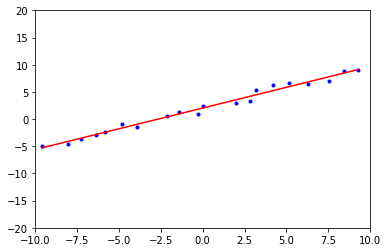

In [9]:
y_pred = lr.predict(X)

plt.xlim((-10, 10))
plt.ylim((-20, 20))
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r-')

## 2.4 Evaluating the model

We can also extract the $R^2$ score of this model:

In [10]:
print('R² score: %f' % lr.score(X, y))

R² score: 0.983519


<br>
<br>


# Bonus examples: Numpy utilities

With linear models, we normally have data that can be represented by either vectors or matrices. Even though you don't need advanced algebra knowledge to implement and understand the models presented, it is useful to understand its basics, since most of the computational part is typically implemented from these concepts.

Numpy is a powerful library that allows us to represent our data easily in this format, and already implements a lot of functions to then manipulate or do calculations over our data. In this section we present the basic functions that you should know and will use the most to implement the basic models:

In [11]:
import numpy as np
import pandas as pd

## a) Pandas to numpy and back

Pandas stores our data in dataframes and series, which are very useful for visualization and even for some specific data operations we want to perform. However, for many algorithms that involve combination of numeric data, the standard form of implementing is by using numpy. Start by seeing how to convert from pandas to numpy and back:

In [12]:
df = pd.read_csv('data/polynomial.csv')
df.head()

,x,x_2,x_3,y
0,-0.974682,0.950004,-0.925952,-1.138194
1,1.043495,1.088882,1.136242,1.116651
2,1.671416,2.793632,4.669321,1.591118
3,-0.051452,0.002647,-0.000136,1.001020
4,1.989017,3.956189,7.868928,-0.973300


### a.1) Pandas to numpy

Let's transform our first column into a numpy vector. There are two ways of doing this, either by using the `.values` attribute:

In [13]:
np_array = df['x'].values
print(np_array[:10])

[-0.97468167  1.04349486  1.67141609 -0.05145155  1.98901715  1.69483221
  2.3605217   3.69166478  1.80589394  1.55395614]


Or by calling the method `.to_numpy()` :

In [14]:
np_array = df['x'].to_numpy()
print(np_array[:10])

[-0.97468167  1.04349486  1.67141609 -0.05145155  1.98901715  1.69483221
  2.3605217   3.69166478  1.80589394  1.55395614]


You can also apply this to the full table:

In [15]:
np_array = df.values
print(np_array[:5, :])

[[-9.74681670e-01  9.50004358e-01 -9.25951835e-01 -1.13819408e+00]
 [ 1.04349486e+00  1.08888152e+00  1.13624227e+00  1.11665074e+00]
 [ 1.67141609e+00  2.79363175e+00  4.66932106e+00  1.59111751e+00]
 [-5.14515491e-02  2.64726191e-03 -1.36205726e-04  1.00102006e+00]
 [ 1.98901715e+00  3.95618924e+00  7.86892827e+00 -9.73300421e-01]]


In [16]:
np_array = df.to_numpy()
print(np_array[:5, :])

[[-9.74681670e-01  9.50004358e-01 -9.25951835e-01 -1.13819408e+00]
 [ 1.04349486e+00  1.08888152e+00  1.13624227e+00  1.11665074e+00]
 [ 1.67141609e+00  2.79363175e+00  4.66932106e+00  1.59111751e+00]
 [-5.14515491e-02  2.64726191e-03 -1.36205726e-04  1.00102006e+00]
 [ 1.98901715e+00  3.95618924e+00  7.86892827e+00 -9.73300421e-01]]


### a.2) Numpy to pandas

Let's start by defining an array and converting it to a pandas series:

In [17]:
np_array = np.array([4., .1, 1., .23, 3.])
pd_series = pd.Series(np_array)
print(pd_series)

0    4.00
1    0.10
2    1.00
3    0.23
4    3.00
dtype: float64


We can also create several series and concatenate them to create a dataframe:

In [18]:
np_array = np.array([4., .1, 1., .23, 3.])
pd_series_1 = pd.Series(np_array, name='A')
pd_series_2 = pd.Series(2 * np_array, name='B')
pd_dataframe = pd.concat((pd_series_1, pd_series_2), axis=1)
pd_dataframe.head()

,A,B
0,4.00,8.00
1,0.10,0.20
2,1.00,2.00
3,0.23,0.46
4,3.00,6.00


We can also directly convert to a dataframe:

In [19]:
np_array = np.array([[1, 2, 3], [4, 5, 6]])
pd_dataframe = pd.DataFrame(np_array)
pd_dataframe.head()

,0,1,2
0,1,2,3
1,4,5,6


However, we might want more detailed names and specific indices. Some ways of achieving this follows:

In [20]:
data = np.array([['','Col1','Col2'],
                ['Row1',1,2],
                ['Row2',3,4]])
                
pd_dataframe = pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:])
pd_dataframe.head()

,Col1,Col2
Row1,1,2
Row2,3,4


In [21]:
pd_dataframe = pd.DataFrame(np.array([[4,5,6,7], [1,2,3,4]]), index=range(0, 2), columns=['A', 'B', 'C', 'D'])
pd_dataframe.head()

,A,B,C,D
0,4,5,6,7
1,1,2,3,4


In [22]:
my_dict = {'A': np.array(['1', '3']), 'B': np.array(['1', '2']), 'C': np.array(['2', '4'])}
pd_dataframe = pd.DataFrame(my_dict)
pd_dataframe.head()

,A,B,C
0,1,1,2
1,3,2,4


## b) Vector and Matrix initialization and shaping

When working with vectors and matrices, we need to be aware of the dimensions of these objects, and how they affect the possible operations perform over them. Numpy allows you to access these dimensions through the shape of the object:

In [23]:
v1 = np.array([ .1, 1.,  2.])

print('1-d Array: {}'.format(v1))
print('Shape: {}'.format(v1.shape))

v2 = np.array([[ .1, 1.,  2.]])

print('\n')
print('2-d Row Array: {}'.format(v2))
print('Shape: {}'.format(v2.shape))

v3 = np.array([[ .1], [1.],  [2.]])

print('\n')
print('2-d Column Array:\n {}'.format(v3))
print('Shape: {}'.format(v3.shape))

m1 = np.array([[ .1, 3., 4., 1.], [1., .3, .1, .5],  [2.,.7, 3.8, .1]])

print('\n')
print('2-d matrix:\n {}'.format(m1))
print('Shape: {}'.format(m1.shape))


1-d Array: [0.1 1.  2. ]
Shape: (3,)


2-d Row Array: [[0.1 1.  2. ]]
Shape: (1, 3)


2-d Column Array:
 [[0.1]
 [1. ]
 [2. ]]
Shape: (3, 1)


2-d matrix:
 [[0.1 3.  4.  1. ]
 [1.  0.3 0.1 0.5]
 [2.  0.7 3.8 0.1]]
Shape: (3, 4)


Another important functionality provided is the possibility of reshaping these objects. For example, we can turn a 1-d array into a row vector:

In [24]:
v1 = np.array([ .1, 1.,  2.])
v1_reshaped = v1.reshape((1, -1))
                         
print('Old 1-d Array reshaped to row: {}'.format(v1_reshaped))
print('Shape: {}'.format(v1_reshaped.shape))


Old 1-d Array reshaped to row: [[0.1 1.  2. ]]
Shape: (1, 3)


Or we can reshape it into a column vector:

In [25]:
v1 = np.array([ .1, 1.,  2.])
v1_reshaped = v2.reshape((-1, 1))
                         
print('Old 1-d Array reshaped to column: \n{}'.format(v1_reshaped))
print('Shape: {}'.format(v1_reshaped.shape))


Old 1-d Array reshaped to column: 
[[0.1]
 [1. ]
 [2. ]]
Shape: (3, 1)


We can also create specific vectors of 1s, 0s or random numbers with specific shapes from the start. See how to use each in the cells that follow:

In [26]:
custom_shape = (3, )
v1_ones = np.ones(custom_shape)
                         
print('1-D Vector of ones: \n{}'.format(v1_ones))
print('Shape: {}'.format(v1_ones.shape))

1-D Vector of ones: 
[1. 1. 1.]
Shape: (3,)


In [27]:
custom_shape = (5, 1)
v1_zeros = np.zeros(custom_shape)
                         
print('2-D vector of zeros: \n{}'.format(v1_zeros))
print('Shape: {}'.format(v1_zeros.shape))

2-D vector of zeros: 
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Shape: (5, 1)


In [28]:
custom_shape = (5, 3)
v1_rand = np.random.rand(custom_shape[0], custom_shape[1])
                         
print('2-D Matrix of random numbers: \n{}'.format(v1_rand))
print('Shape: {}'.format(v1_rand.shape))

2-D Matrix of random numbers: 
[[0.12203823 0.49517691 0.03438852]
 [0.9093204  0.25877998 0.66252228]
 [0.31171108 0.52006802 0.54671028]
 [0.18485446 0.96958463 0.77513282]
 [0.93949894 0.89482735 0.59789998]]
Shape: (5, 3)


## c) Vector and Matrix Concatenation 

In this section, you will learn how to concatenate 2 vectors, a matrix and a vector, or 2 matrices. 

### c.1) Vector - Vector

Let's start by defining 2 vectors:

In [29]:
v1 = np.array([ .1, 1.,  2.])
v2 = np.array([5.1, .3, .41, 3. ])

print('1st array: {}'.format(v1))
print('Shape: {}'.format(v1.shape))

print('2nd array: {}'.format(v2))
print('Shape: {}'.format(v2.shape))

1st array: [0.1 1.  2. ]
Shape: (3,)
2nd array: [5.1  0.3  0.41 3.  ]
Shape: (4,)


Since vectors only have one dimension with a given size (notice the shape with only one element) we can only concatenate in this dimension, leading to a longer vector:

In [30]:
vconcat = np.concatenate((v1, v2))
print('Concatenated vector: {}'.format(vconcat))
print('Shape: {}'.format(vconcat.shape))

Concatenated vector: [0.1  1.   2.   5.1  0.3  0.41 3.  ]
Shape: (7,)


Concatenating vectors is very easy, and since we can only concatenate them in their one dimension, the sizes do not have to match. Now let's move on to a more complex case.

### c.2) Matrix - row vector

When concatenating matrices and vectors we have to take into account their dimensions.

In [31]:
v1 = np.array([ .1, 1.,  2., 3.])
m1 = np.array([[5.1, .3, .41, 3. ], [5.1, .3, .41, 3. ]])

print('Array: {}'.format(v1))
print('Shape: {}'.format(v1.shape))

print('Matrix: \n{}'.format(m1))
print('Shape: {}'.format(m1.shape))

Array: [0.1 1.  2.  3. ]
Shape: (4,)
Matrix: 
[[5.1  0.3  0.41 3.  ]
 [5.1  0.3  0.41 3.  ]]
Shape: (2, 4)


The first thing you need to know is that whatever numpy objects you are trying to concatenate need to have the same dimensions. Run the code below to verify that you can not concatenate directly the vector and matrix:

In [32]:
try:
    vconcat = np.concatenate((v1, m1))
except Exception as e:
    print('Concatenation raised the following error: {}'.format(e))
    

Concatenation raised the following error: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


So how can we do matrix-vector concatenation? 

It is actually quite simple. We'll use the reshape functionality you seen before to add a dimension to the vector.

In [33]:
v1_reshaped = v1.reshape((1, v1.shape[0]))
m1 = np.array([[5.1, .3, .41, 3. ], [5.1, .3, .41, 3. ]])

print('Array: {}'.format(v1_reshaped))
print('Shape: {}'.format(v1_reshaped.shape))

print('Matrix: \n{}'.format(m1))
print('Shape: {}'.format(m1.shape))

Array: [[0.1 1.  2.  3. ]]
Shape: (1, 4)
Matrix: 
[[5.1  0.3  0.41 3.  ]
 [5.1  0.3  0.41 3.  ]]
Shape: (2, 4)


We've reshaped our vector into a 1-row matrix. Now we can try to perform the same concatenation:

In [34]:
vconcat = np.concatenate((v1_reshaped, m1))
print('Concatenated vector: {}'.format(vconcat))
print('Shape: {}'.format(vconcat.shape))

Concatenated vector: [[0.1  1.   2.   3.  ]
 [5.1  0.3  0.41 3.  ]
 [5.1  0.3  0.41 3.  ]]
Shape: (3, 4)


### c.3) Matrix - column vector

We can also do this procedure with a column vector:

In [35]:
v1 = np.array([ .1, 1.])
v1_reshaped = v1.reshape((v1.shape[0], 1))
m1 = np.array([[5.1, .3, .41, 3. ], [5.1, .3, .41, 3. ]])

print('Array: \n{}'.format(v1_reshaped))
print('Shape: {}'.format(v1_reshaped.shape))

print('Matrix: \n{}'.format(m1))
print('Shape: {}'.format(m1.shape))

vconcat = np.concatenate((v1_reshaped, m1), axis=1)
print('Concatenated vector: {}'.format(vconcat))
print('Shape: {}'.format(vconcat.shape))

Array: 
[[0.1]
 [1. ]]
Shape: (2, 1)
Matrix: 
[[5.1  0.3  0.41 3.  ]
 [5.1  0.3  0.41 3.  ]]
Shape: (2, 4)
Concatenated vector: [[0.1  5.1  0.3  0.41 3.  ]
 [1.   5.1  0.3  0.41 3.  ]]
Shape: (2, 5)


There's yet another restriction when concatenating vectors and matrices. The dimension where we want to concatenate has to share the same size.

See what would happen if we tried to concatenate a smaller vector with the same matrix:

In [36]:
v2 = np.array([ .1, 1.])
v2_reshaped = v2.reshape((1, v2.shape[0])) # Row vector as matrix

try:
    vconcat = np.concatenate((v2, m1))
except Exception as e:
    print('Concatenation raised the following error: {}'.format(e))

Concatenation raised the following error: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)


### c.4) Matrix - Matrix

This is just an extension of the previous case, since what we did before was transforming the vector into a matrix where the size of one of the dimensions is 1. So all the same restrictions apply, the arrays must have compatible dimensions. Run the following examples to see this:


In [37]:
m1 = np.array([[5.1, .3, .41, 3. ], [5.1, .3, .41, 3. ]])
m2 = np.array([[1., 2., 0., 3. ], [.1, .13, 1., 3. ],  [.1, 2., .5, .3 ]])
m3 = np.array([[1., 0. ], [0., 1. ]])

print('Matrix 1: \n{}'.format(m1))
print('Shape: {}'.format(m1.shape))

print('Matrix 2: \n{}'.format(m2))
print('Shape: {}'.format(m2.shape))

print('Matrix 3: \n{}'.format(m3))
print('Shape: {}'.format(m3.shape))

Matrix 1: 
[[5.1  0.3  0.41 3.  ]
 [5.1  0.3  0.41 3.  ]]
Shape: (2, 4)
Matrix 2: 
[[1.   2.   0.   3.  ]
 [0.1  0.13 1.   3.  ]
 [0.1  2.   0.5  0.3 ]]
Shape: (3, 4)
Matrix 3: 
[[1. 0.]
 [0. 1.]]
Shape: (2, 2)


Concatenate m1 and m2 at row level (stack the two matrices):

In [38]:
mconcat = np.concatenate((m1, m2))
print('Concatenated matrix:\n {}'.format(mconcat))
print('Shape: {}'.format(mconcat.shape))

Concatenated matrix:
 [[5.1  0.3  0.41 3.  ]
 [5.1  0.3  0.41 3.  ]
 [1.   2.   0.   3.  ]
 [0.1  0.13 1.   3.  ]
 [0.1  2.   0.5  0.3 ]]
Shape: (5, 4)


Concatenate m1 and m2 at column level (joining the two matrices side by side) should produce an error:

In [39]:
try:
    vconcat = np.concatenate((m1, m2), axis=1)
except Exception as e:
    print('Concatenation raised the following error: {}'.format(e))
    

Concatenation raised the following error: all the input array dimensions for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 2 and the array at index 1 has size 3


Concatenate m1 and m3 at column level (joining the two matrices side by side):

In [40]:
mconcat = np.concatenate((m1, m3), axis=1)
print('Concatenated matrix:\n {}'.format(mconcat))
print('Shape: {}'.format(mconcat.shape))

Concatenated matrix:
 [[5.1  0.3  0.41 3.   1.   0.  ]
 [5.1  0.3  0.41 3.   0.   1.  ]]
Shape: (2, 6)


Concatenate m1 and m3 at row level (stack the two matrices) should produce an error:

In [41]:
try:
    vconcat = np.concatenate((m1, m3))
except Exception as e:
    print('Concatenation raised the following error: {}'.format(e))
    

Concatenation raised the following error: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 2


## d) Single matrix operations 

In this section we describe a few operations that can be done over matrices:

### d.1) Transpose

A very common operation is the transpose. If you are used to see matrix notation, you should know what this operation is. Take a matrix with 2 dimensions:

$$ X = \begin{bmatrix} a & b \\ c & d \\ \end{bmatrix} $$

Transposing the matrix is inverting its data with respect to its diagonal:

$$ X^T = \begin{bmatrix} a & c \\ b & d \\ \end{bmatrix} $$

This means that the rows of X will become its columns and vice-versa. You can attain the transpose of a matrix by using either `.T` on a matrix or calling `numpy.transpose`:

In [42]:
m1 = np.array([[ .1, 1.,  2.], [ 3., .24,  4.], [ 6., 2.,  5.]])            
print('Initial matrix: \n{}'.format(m1))

Initial matrix: 
[[0.1  1.   2.  ]
 [3.   0.24 4.  ]
 [6.   2.   5.  ]]


In [43]:
m1_transposed = m1.transpose()
print('Transposed matrix with `transpose` \n{}'.format(m1_transposed))

Transposed matrix with `transpose` 
[[0.1  3.   6.  ]
 [1.   0.24 2.  ]
 [2.   4.   5.  ]]


In [44]:
m1_transposed = m1.T
print('Transposed matrix with `T` \n{}'.format(m1_transposed))

Transposed matrix with `T` 
[[0.1  3.   6.  ]
 [1.   0.24 2.  ]
 [2.   4.   5.  ]]


A few examples of non-squared matrices. In these, you'll see that the shape (a, b) gets inverted to (b, a):

In [45]:
m1 = np.array([[ .1, 1.,  2., 5.], [ 3., .24,  4., .6]])     
print('Initial matrix: \n{}'.format(m1))

m1_transposed = m1.T
print('Transposed matrix: \n{}'.format(m1_transposed))


Initial matrix: 
[[0.1  1.   2.   5.  ]
 [3.   0.24 4.   0.6 ]]
Transposed matrix: 
[[0.1  3.  ]
 [1.   0.24]
 [2.   4.  ]
 [5.   0.6 ]]


In [46]:
m1 = np.array([[ .1, 1.], [2., 5.], [ 3., .24], [4., .6]])     
print('Initial matrix: \n{}'.format(m1))

m1_transposed = m1.T
print('Transposed matrix: \n{}'.format(m1_transposed))


Initial matrix: 
[[0.1  1.  ]
 [2.   5.  ]
 [3.   0.24]
 [4.   0.6 ]]
Transposed matrix: 
[[0.1  2.   3.   4.  ]
 [1.   5.   0.24 0.6 ]]


For vectors represented as matrices, this means transforming from a row vector (1, N) to a column vector (N, 1) or vice-versa:

In [47]:
v1 = np.array([ .1, 1.,  2.])
v1_reshaped = v1.reshape((1, -1))
                         
print('Row vector as 2-d array: {}'.format(v1_reshaped))
print('Shape: {}'.format(v1_reshaped.shape))

v1_transposed = v1_reshaped.T

print('Transposed (column vector as 2-d array): \n{}'.format(v1_transposed))
print('Shape: {}'.format(v1_transposed.shape))


Row vector as 2-d array: [[0.1 1.  2. ]]
Shape: (1, 3)
Transposed (column vector as 2-d array): 
[[0.1]
 [1. ]
 [2. ]]
Shape: (3, 1)


In [48]:
v1 = np.array([ 3., .23,  2., .6])
v1_reshaped = v1.reshape((-1, 1))
                         
print('Column vector as 2-d array: \n{}'.format(v1_reshaped))
print('Shape: {}'.format(v1_reshaped.shape))

v1_transposed = v1_reshaped.T

print('Transposed (row vector as 2-d array): {}'.format(v1_transposed))
print('Shape: {}'.format(v1_transposed.shape))


Column vector as 2-d array: 
[[3.  ]
 [0.23]
 [2.  ]
 [0.6 ]]
Shape: (4, 1)
Transposed (row vector as 2-d array): [[3.   0.23 2.   0.6 ]]
Shape: (1, 4)


### d.2) Statistics operators

Numpy also allows us to perform several operations over the rows and columns of a matrix, such as: 
 
* Sum
* Mean
* Max
* Min
* ...

The most important thing to take into account when using these is to know exactly in which direction we are performing the operations. We can perform, for example, a `max` operation over the whole matrix, obtaining the max value in all of the matrix values. Or we might want this value for each row, or for each column. Check the following examples:

In [49]:
m1 = np.array([[ .1, 1.], [2., 5.], [ 3., .24], [4., .6]])     
print('Initial matrix: \n{}'.format(m1))

Initial matrix: 
[[0.1  1.  ]
 [2.   5.  ]
 [3.   0.24]
 [4.   0.6 ]]


Operating over all matrix' values:

In [50]:
print('Total sum of matrix elements: {}'.format(m1.sum()))
print('Minimum of all matrix elements: {}'.format(m1.max()))
print('Maximum of all matrix elements: {}'.format(m1.min()))
print('Mean of all matrix elements: {}'.format(m1.mean()))

Total sum of matrix elements: 15.94
Minimum of all matrix elements: 5.0
Maximum of all matrix elements: 0.1
Mean of all matrix elements: 1.9925


Operating across rows - produces a row with the sum/max/min/mean for each column:

In [51]:
print('Total sum of matrix elements: {}'.format(m1.sum(axis=0)))
print('Minimum of all matrix elements: {}'.format(m1.max(axis=0)))
print('Maximum of all matrix elements: {}'.format(m1.min(axis=0)))
print('Mean of all matrix elements: {}'.format(m1.mean(axis=0)))

Total sum of matrix elements: [9.1  6.84]
Minimum of all matrix elements: [4. 5.]
Maximum of all matrix elements: [0.1  0.24]
Mean of all matrix elements: [2.275 1.71 ]


Operating across columns - produces a column with the sum/max/min/mean for each row:

In [52]:
print('Total sum of matrix elements: {}'.format(m1.sum(axis=1)))
print('Minimum of all matrix elements: {}'.format(m1.max(axis=1)))
print('Maximum of all matrix elements: {}'.format(m1.min(axis=1)))
print('Mean of all matrix elements: {}'.format(m1.mean(axis=1)))

Total sum of matrix elements: [1.1  7.   3.24 4.6 ]
Minimum of all matrix elements: [1. 5. 3. 4.]
Maximum of all matrix elements: [0.1  2.   0.24 0.6 ]
Mean of all matrix elements: [0.55 3.5  1.62 2.3 ]


As an example, imagine that you have a matrix of shape (n_samples, n_features), where each row represents all the features for one sample. Then , to average over the samples, we do:

In [53]:
m1 = np.array([[ .1, 1.], [2., 5.], [ 3., .24], [4., .6]])     
print('Initial matrix: \n{}'.format(m1))

print('\n')
print('Sample 1: {}'.format(m1[0, :]))
print('Sample 2: {}'.format(m1[1, :]))
print('Sample 3: {}'.format(m1[2, :]))
print('Sample 4: {}'.format(m1[3, :]))
print('\n')

print('Average over samples: \n{}'.format(m1.mean(axis=0)))

Initial matrix: 
[[0.1  1.  ]
 [2.   5.  ]
 [3.   0.24]
 [4.   0.6 ]]


Sample 1: [0.1 1. ]
Sample 2: [2. 5.]
Sample 3: [3.   0.24]
Sample 4: [4.  0.6]


Average over samples: 
[2.275 1.71 ]


Other statistical functions behave in a similar manner, so it is important to know how to work the axis of these objects.

## e) Multiple matrix operations  

### e.1) Element wise operations

Several operations available work at the element level, this is, if we have two matrices A and B:

$$ A = \begin{bmatrix} a & b \\ c & d \\ \end{bmatrix} $$

and 

$$ B = \begin{bmatrix} e & f \\ g & h \\ \end{bmatrix} $$

an element-wise operation produces a matrix:

$$ Op(A, B) = \begin{bmatrix} Op(a,e) & Op(b,f) \\ Op(c,g) & Op(d,h) \\ \end{bmatrix} $$

You can perform sum and difference, but also element-wise multiplication and division. These are implemented with the regular operators `+`, `-`, `*`, `/`. Check out the examples below:

In [54]:
m1 = np.array([[ .1, 1.,  2., 5.], [ 3., .24,  4., .6]])     
m2 = np.array([[ .1, 4., .25, .1], [ 2., 1.5, .42, -1.]])     

print('Matrix 1: \n{}'.format(m1))
print('Matrix 2: \n{}'.format(m1))

print('\n')
print('Sum: \n{}'.format(m1 + m2))

print('\n')
print('Difference: \n{}'.format(m1 - m2))

print('\n')
print('Multiplication: \n{}'.format(m1*m2))

print('\n')
print('Division: \n{}'.format(m1/m2))

Matrix 1: 
[[0.1  1.   2.   5.  ]
 [3.   0.24 4.   0.6 ]]
Matrix 2: 
[[0.1  1.   2.   5.  ]
 [3.   0.24 4.   0.6 ]]


Sum: 
[[ 0.2   5.    2.25  5.1 ]
 [ 5.    1.74  4.42 -0.4 ]]


Difference: 
[[ 0.   -3.    1.75  4.9 ]
 [ 1.   -1.26  3.58  1.6 ]]


Multiplication: 
[[ 0.01  4.    0.5   0.5 ]
 [ 6.    0.36  1.68 -0.6 ]]


Division: 
[[ 1.          0.25        8.         50.        ]
 [ 1.5         0.16        9.52380952 -0.6       ]]


For these operations, ideally your matrices should have the same dimensions. An exception to this is when you have one of the elements that can be [broadcasted](https://numpy.org/doc/stable/user/basics.broadcasting.html) over the other. However we won't cover that in these examples.

### e.2) Matrix multiplication

Although you've seen how to perform element wise multiplication with the basic operation, one of the most common matrix operations is matrix multiplication, where the output is not the result of an element wise combination of its elements, but actually a linear combination between rows of the first matrix nd columns of the second.

In other words, element (i, j) of the resulting matrix is the dot product between row i of the first matrix and column j of the second:

![matrix-multiply](assets/matrix-multiply-a.svg)

Where the dot product represented breaks down to:

$$ 58 =  1 \times 7 + 2 \times 9 + 3 \times 11 $$

Numpy already provides this function, so check out the following examples:

In [55]:
m1 = np.array([[ .1, 1.,  2., 5.], [ 3., .24,  4., .6]])     
m2 = np.array([[ .1, 4.], [.25, .1], [ 2., 1.5], [.42, -1.]])     

print('Matrix 1: \n{}'.format(m1))
print('Matrix 2: \n{}'.format(m1))

print('\n')
print('Matrix multiplication: \n{}'.format(np.matmul(m1, m2)))


Matrix 1: 
[[0.1  1.   2.   5.  ]
 [3.   0.24 4.   0.6 ]]
Matrix 2: 
[[0.1  1.   2.   5.  ]
 [3.   0.24 4.   0.6 ]]


Matrix multiplication: 
[[ 6.36  -1.5  ]
 [ 8.612 17.424]]


In [56]:
m1 = np.array([[ .1, 4.], [.25, .1], [ 2., 1.5], [.42, -1.]])     
m2 = np.array([[ .1, 1.,  2.], [ 3., .24,  4.]])     

print('Matrix 1: \n{}'.format(m1))
print('Matrix 2: \n{}'.format(m1))

print('\n')
print('Matrix multiplication: \n{}'.format(np.matmul(m1, m2)))


Matrix 1: 
[[ 0.1   4.  ]
 [ 0.25  0.1 ]
 [ 2.    1.5 ]
 [ 0.42 -1.  ]]
Matrix 2: 
[[ 0.1   4.  ]
 [ 0.25  0.1 ]
 [ 2.    1.5 ]
 [ 0.42 -1.  ]]


Matrix multiplication: 
[[12.01   1.06  16.2  ]
 [ 0.325  0.274  0.9  ]
 [ 4.7    2.36  10.   ]
 [-2.958  0.18  -3.16 ]]


Notice that in both operations the matrix multiplication of shapes `(k, l)` and `(m, n)` yields a matrix of dimensions `(k, n)`. Additionally, for this operation to be possible, the inner dimensions need to match, this is `l == m` . See what happens if we try to multiply matrices with incompatible dimensions:

In [57]:
m1 = np.array([[ .1, 4., 3.], [.25, .1, 1.], [ 2., 1.5, .5], [.42, -1., 4.3]])     
m2 = np.array([[ .1, 1.,  2.], [ 3., .24,  4.]])     

print('Matrix 1: \n{}'.format(m1))
print('Shape: {}'.format(m1.shape))

print('Matrix 2: \n{}'.format(m1))
print('Shape: {}'.format(m2.shape))
print('\n')

try:
    m3 = np.matmul(m1, m2)
except Exception as e:
    print('Matrix multiplication raised the following error: {}'.format(e))


Matrix 1: 
[[ 0.1   4.    3.  ]
 [ 0.25  0.1   1.  ]
 [ 2.    1.5   0.5 ]
 [ 0.42 -1.    4.3 ]]
Shape: (4, 3)
Matrix 2: 
[[ 0.1   4.    3.  ]
 [ 0.25  0.1   1.  ]
 [ 2.    1.5   0.5 ]
 [ 0.42 -1.    4.3 ]]
Shape: (2, 3)


Matrix multiplication raised the following error: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)
